# <center>Принятие решений в бизнесе</center>

## Описание Проекта

<b>Приоритизация гипотез и анализ A/B-теста</b><br>

<b>Цель исследования</b><br>

Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.<br>
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.<br>

<b>Ход исследования</b><br>

Часть 1. Приоритизация гипотез<br>

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<br>
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<br>
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.<br>

Часть 2. Анализ A/B-теста<br>

Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.<br>
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.<br>
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.<br>
Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.<br>
Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.<br>
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.<br>
Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.<br>
Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.<br>
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.<br>
Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.<br>
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.<br>
Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.<br>
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.<br>
Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.<br>




## Описание данных

<b>Данные для первой части</b><br>

Файл `/datasets/hypothesis.csv` <br>

`Hypothesis` — краткое описание гипотезы;<br>
`Reach` — охват пользователей по 10-балльной шкале;<br>
`Impact` — влияние на пользователей по 10-балльной шкале;<br>
`Confidence` — уверенность в гипотезе по 10-балльной шкале;<br>
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.<br>


<b>Данные для второй части</b><br>

Файл `/datasets/orders.csv` <br>

`transactionId` — идентификатор заказа;<br>
`visitorId` — идентификатор пользователя, совершившего заказ;<br>
`date` — дата, когда был совершён заказ;<br>
`revenue` — выручка заказа;<br>
`group` — группа A/B-теста, в которую попал заказ.<br>

Файл `/datasets/visitors.csv`<br>

`date` — дата;<br>
`group` — группа A/B-теста; <br>
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста<br>

## Загрузите данные и подготовьте их к анализу

In [1]:
#Иморт библиотек
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st
warnings.filterwarnings('ignore')

In [2]:
#Загрузка данных
try:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    print('Данные загружены')
except:
        try:
            hypothesis = pd.read_csv('/datasets/hypothesis.csv')
            orders = pd.read_csv('/datasets/orders.csv')
            visitors = pd.read_csv('/datasets/visitors.csv')
            print('Данные загружены из локального источника')
        except:
            print('Данные не загружены')

Данные загружены


#### Обработка таблицы hypothesis

In [3]:
#Вывод первых пять строк
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
#информация о датафрейме
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
#Поиск соотношения пропущенных значений в столбце
pd.DataFrame(hypothesis.isna().mean()).style.background_gradient('Reds').format({0:'{:.2%}'})

,0
Hypothesis,0.00%
Reach,0.00%
Impact,0.00%
Confidence,0.00%
Efforts,0.00%


In [6]:
#Приведение к нижнему регистру название столбцов
hypothesis.columns = hypothesis.columns.str.lower()

In [7]:
#Вывод строк полных дубликатов
hypothesis[hypothesis.duplicated(keep=False)]

,hypothesis,reach,impact,confidence,efforts


In [8]:
#Значения столбца hypothesis
#pd.options.display.max_colwidth = 100
hypothesis['hypothesis'].value_counts().to_frame()

,hypothesis
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",1
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",1
"Запустить собственную службу доставки, что сократит срок доставки заказов",1
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",1
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",1
"Запустить акцию, дающую скидку на товар в день рождения",1


#### Обработка таблицы orders

In [9]:
#Вывод первых пять строк
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
#информация о датафрейме
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
#Поиск соотношения пропущенных значений в столбце
pd.DataFrame(orders.isna().mean()).style.background_gradient('Reds').format({0:'{:.2%}'})

,0
transactionId,0.00%
visitorId,0.00%
date,0.00%
revenue,0.00%
group,0.00%


In [12]:
#Приведение к нижнему регистру название столбцов
orders.columns = orders.columns.str.lower()

In [13]:
# Изменение тип данных
orders['date'] = pd.to_datetime(orders['date'])

In [14]:
#Вывод строк полных дубликатов
orders[orders.duplicated(keep=False)]

,transactionid,visitorid,date,revenue,group


In [15]:
#Значения столбца transactionid
orders['transactionid'].value_counts()

1658608862    1
2211880073    1
3913205113    1
437656952     1
3592105335    1
             ..
2872509092    1
2013919907    1
3154167297    1
2960804513    1
4281129020    1
Name: transactionid, Length: 1197, dtype: int64

In [16]:
#Значения столбца visitorid
orders['visitorid'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitorid, Length: 1031, dtype: int64

In [17]:
#Значения столбца date
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [18]:
#Значения столбца revenue
orders['revenue'].value_counts()

990       17
890       13
390       13
1190      10
400       10
          ..
6440       1
45780      1
725        1
9800       1
202740     1
Name: revenue, Length: 713, dtype: int64

In [19]:
#Значения столбца group
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

#### Обработка таблицы visitors

In [20]:
#Вывод первых пять строк
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
#информация о датафрейме
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [22]:
#Поиск соотношения пропущенных значений в столбце
pd.DataFrame(visitors.isna().mean()).style.background_gradient('Reds').format({0:'{:.2%}'})

,0
date,0.00%
group,0.00%
visitors,0.00%


In [23]:
# Изменение тип данных
visitors['date'] = pd.to_datetime(visitors['date'])

In [24]:
#Вывод строк полных дубликатов
visitors[visitors.duplicated(keep=False)]

,date,group,visitors


In [25]:
#Значения столбца date
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [26]:
#Значения столбца group
visitors['group'].value_counts()

B    31
A    31
Name: group, dtype: int64

In [27]:
#Значения столбца visitors
visitors['visitors'].value_counts()

610    2
718    2
654    2
490    2
609    1
717    1
719    1
720    1
721    1
594    1
722    1
468    1
595    1
756    1
735    1
769    1
711    1
668    1
487    1
361    1
746    1
619    1
748    1
621    1
369    1
628    1
709    1
378    1
507    1
713    1
581    1
770    1
413    1
644    1
646    1
650    1
395    1
655    1
737    1
531    1
502    1
406    1
667    1
412    1
543    1
707    1
544    1
546    1
676    1
421    1
617    1
679    1
560    1
656    1
699    1
575    1
577    1
509    1
Name: visitors, dtype: int64

### Вывод

Дубликатов и пропущенных значений нету.<br>
Название столбцов приведены к нижнему регистру.<br>
Колонки с датами имеющие тип "object" преобразованы в "datetime64".<br>

## Приоритезация гипотез

### Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [28]:
hypothesis['ice'] = hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis.loc[:, ['hypothesis', 'ice']].sort_values(by='ice', ascending=False).style.format({'ice':'{:.2f}'})\
.background_gradient(cmap='YlGn', subset='ice')

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE:<br>
Запустить акцию, дающую скидку на товар в день рождения<br>
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей<br>
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок<br>
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию<br>
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа<br>

### Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [29]:
hypothesis['rice'] = hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis.loc[:, ['hypothesis', 'rice']].sort_values(by='rice', ascending=False).style.format({'rice':'{:.2f}'})\
.background_gradient(cmap='YlGn', subset='rice')

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Наиболее перспективные гипотезы по RICE:<br>
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок<br>
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа<br>
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей<br>
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию<br>
Запустить акцию, дающую скидку на товар в день рождения<br>

### Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.

Первые пять гипотез совпадает по `ICE` и по `RICE`, но в разной последовательности. <br>
`RICE` включает в себя еще один параметр `Reach`, который повлиял на перестановку гипотез по степени приоритетности. <br>
<br>
Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" опустилась на пятое место по RICE. Данная акция доступна пользователям раз в год, что в значительной мере уменьшает охват или даже становится совсем не заметным.

Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" поднялась с третьего на первое место. Данная акция затрагивает большое количество пользователей.

### Вывод

Для анализа A/B-теста лучше использовать гипотезы с наибольшем количеством набранных баллов по `Rice`.


## Анализ A/B-теста

#### Проверка размер групп в выборке

In [30]:
purchasesA = len(orders[orders['group']=='A'])
purchasesB = len(orders[orders['group']=='B'])

results = st.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05
print(f'P-value:{results.pvalue}')
if results.pvalue < alpha:
    print('Разница статистически значима')
else:
    print('Вывод о различии сделать нельзя')

P-value:0.7301376549390499
Вывод о различии сделать нельзя


#### Создания кумулятивных данных

In [31]:
# создание датафрейма datesGroups с уникальными парами значений 'date' и 'group', таблицы orders; удаление дубликатов
datesGroups = orders[['date', 'group']].drop_duplicates()


ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', # дата
            'group': 'max', # группа A/B-теста
            'transactionid': 'nunique', # число уникальных заказов в группе теста по указанную дату включительно
            'visitorid': 'nunique', # число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста
            'revenue': 'sum', # суммарная выручка заказов в группе теста по указанную дату включительно
        }
    ),
    axis=1,
).sort_values(by=['date', 'group']) # сортировка по столбцам 'date', 'group'


visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# определение переменной по колонкам 'date', 'group' методом merge()
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

# присвоение столбцам cumulativeData названия
cumulativeData.columns = [
    'date',
    'group',
    'orders', # количество покупок 
    'buyers', # количество покупателей 
    'revenue', # выручка 
    'visitors', # количество посетителей
]

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### Проверка пользователей

In [32]:
# отбираем группы из данных с заказами 
users_a=orders.query('group == "A"') 
users_b=orders.query('group == "B"') 
  
# пользователи, попавших в обе группы 
np.intersect1d(users_a['visitorid'], users_b['visitorid'])

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

58 пользователей, которые присутствуют в обоих группах.

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

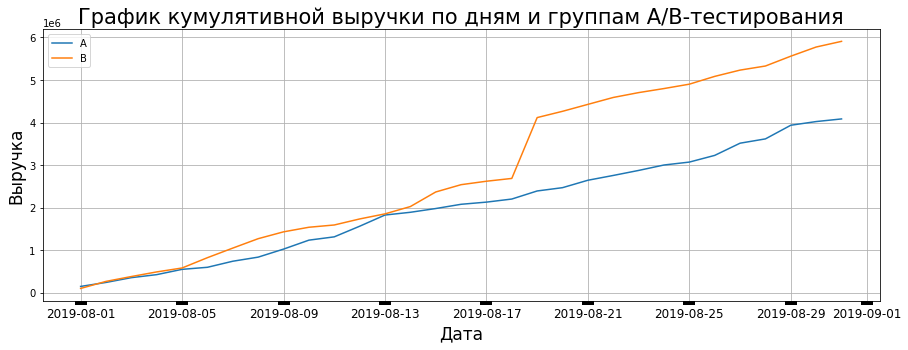

In [33]:
# переменная с данными о датах, выручке и числе заказов в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

# переменная с данными о датах, выручке и числе заказов в группе В
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

# график кумулятивной выручки по группам
plt.figure(figsize=(15,5))
plt.grid()

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.tick_params(axis='x', which='major', labelsize=12, width=12)
plt.title('График кумулятивной выручки по дням и группам A/B-тестирования', fontsize=21)
plt.xlabel('Дата', fontsize=17)
plt.ylabel('Выручка', fontsize=17)
plt.legend()
plt.show()

В течение всего периода выручка группы B лежит выше, чем у группы A. С 19 августа выручка у сегмента В резко подскочила вверх.

In [34]:
orders.query('date == "2019-08-19"').sort_values(by='revenue', ascending=False).head(3)

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B


19 августа был совершен один большой заказ.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

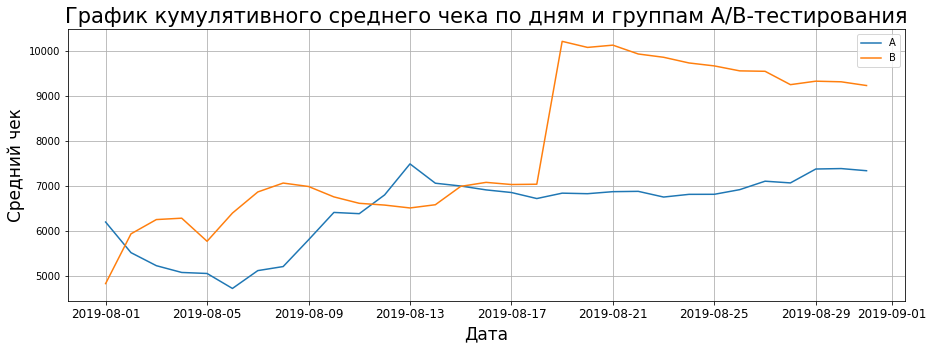

In [35]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(15,5))
plt.grid()

# cтроим отношение средних чеков
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label = 'A')
# cтроим отношение средних чеков
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label = 'B')

plt.tick_params(axis='x', which='major', labelsize=12)
plt.title('График кумулятивного среднего чека по дням и группам A/B-тестирования', fontsize=21)
plt.xlabel('Дата', fontsize=17)
plt.ylabel('Средний чек', fontsize=17)
plt.legend()
plt.show()

Cредний чек в группе B, почти всё время был выше. С 19 августа средний чек группы В резко подскочила вверх. Скорее всего, были чрезмерно крупные заказы, которые могут влиять на результаты.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

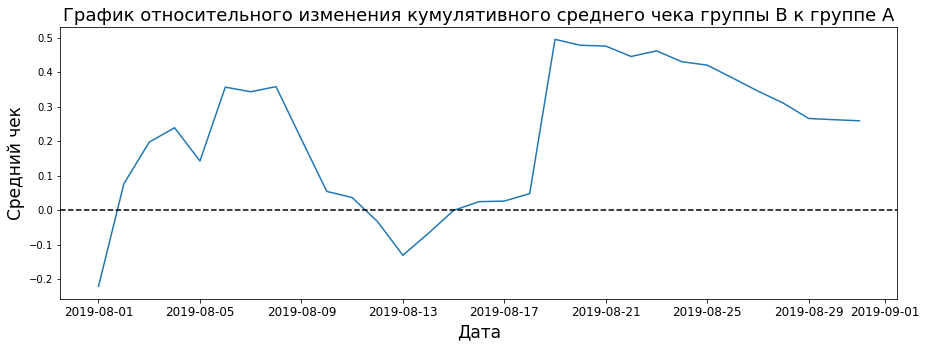

In [36]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(\
cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'],\
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


plt.tick_params(axis='x', which='major', labelsize=12)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=18)
plt.xlabel('Дата', fontsize=17)
plt.ylabel('Средний чек', fontsize=17)
plt.show()

Результаты резко менялись в несколько раз. В одну из дат были совершены аномальные заказы в группе В.

### Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.

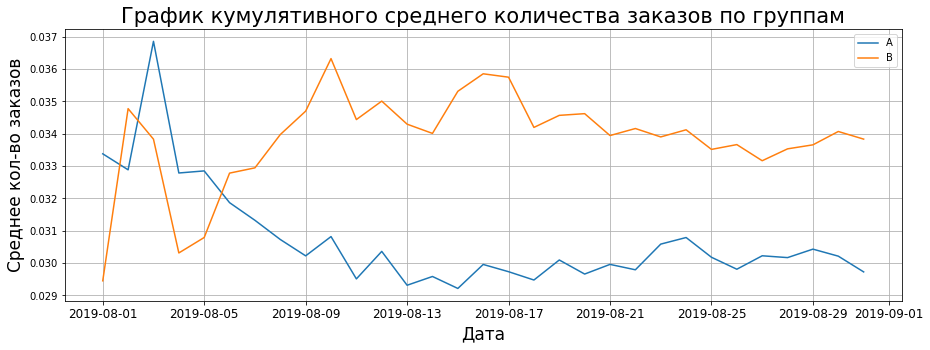

In [37]:
# среднеие количество заказов по группам
cumulativeData['avg_orders'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


#Построим график кумулятивного среднего количества заказов по группам
plt.figure(figsize=(15,5))
plt.grid()

# cтроим отношение средних чеков
plt.plot(cumulativeDataA['date'], cumulativeDataA['avg_orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['avg_orders'], label='B')

plt.tick_params(axis='x', which='major', labelsize=12)
plt.title('График кумулятивного среднего количества заказов по группам', fontsize=21)
plt.xlabel('Дата', fontsize=17)
plt.ylabel('Среднее кол-во заказов', fontsize=17)
plt.legend()
plt.show()

Группа B показывает большие количества заказов на притяжение большего времени, чем группа A.

### Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.

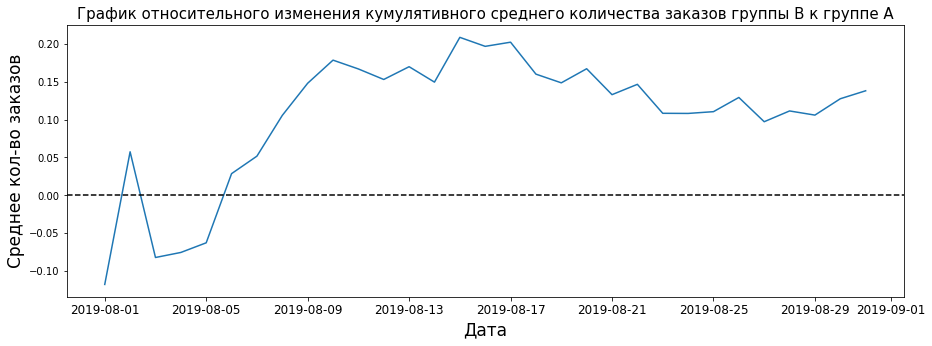

In [38]:
# собираем данные в одном датафрейме
mergedCumulativeAVG = cumulativeDataA[['date','avg_orders']].merge(cumulativeDataB[['date','avg_orders']],\
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeAVG['date'],\
         mergedCumulativeAVG['avg_ordersB']/mergedCumulativeAVG['avg_ordersA']-1)


plt.tick_params(axis='x', which='major', labelsize=12)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A', fontsize=15)
plt.xlabel('Дата', fontsize=17)
plt.ylabel('Среднее кол-во заказов', fontsize=17)
plt.show()

Прирост среднего количества заказов в группе B стабильно лучше, чем в группе A.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

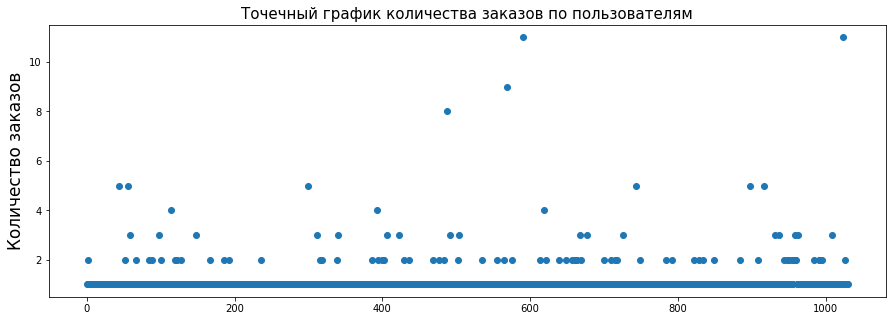

In [39]:
ordersByUsers = (orders.groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique}))
ordersByUsers.columns = ['visitorId', 'orders']

plt.figure(figsize=(15,5))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Точечный график количества заказов по пользователям', fontsize=15)
plt.ylabel('Количество заказов', fontsize=17)
plt.show()

Большинство пользователей не совершает более 2 заказов. Есть несколько пользователей, которые делали заказов свыше 10.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [40]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Больше 2 заказов совершают только 5% пользователей. Граница для определения аномальных пользователей - более 2 заказов.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

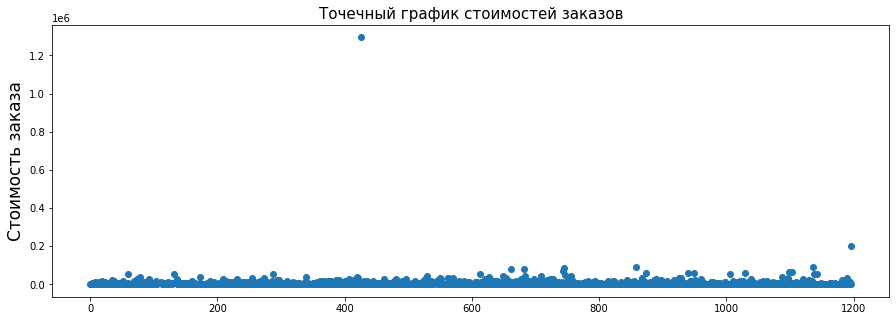

In [41]:
plt.figure(figsize=(15,5))

# серия из чисел от 0 до количества наблюдений в orders
x_values = pd.Series(range(0, len(orders)))
plt.scatter(x_values, orders['revenue'])

plt.title('Точечный график стоимостей заказов', fontsize=15)
plt.ylabel('Стоимость заказа', fontsize=17)
plt.show()

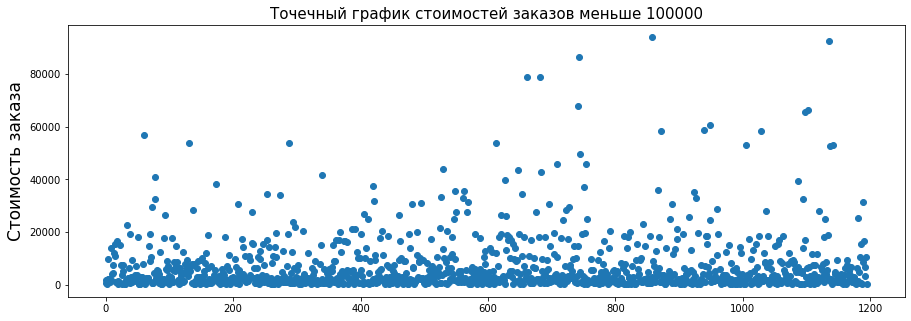

In [42]:
# Заказы стоимостью меньше 100000
orders_m100 = orders[orders['revenue']<=100000]['revenue']
plt.figure(figsize=(15,5))

# серия из чисел от 0 до количества наблюдений в orders_m100
x_values = pd.Series(range(0, len(orders_m100)))
plt.scatter(x_values, orders_m100)

plt.title('Точечный график стоимостей заказов меньше 100000', fontsize=15)
plt.ylabel('Стоимость заказа', fontsize=17)
plt.show()

Большая часть заказов на суммой меньше 30000.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [43]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Всего лишь 5% заказов дороже 28000. Граница для определения аномальных заказов - менее 28000. 

### Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

Нулевая гипотеза: различий в среднем количестве заказов между группами нет.

Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

In [44]:
#Начнём с подготовки данных.
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
#собрали в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [45]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [46]:
ordersByUsersA = (
    orders[orders['group'] == 'A']\
    .groupby('visitorid', as_index=False)\
    .agg({'transactionid': pd.Series.nunique})\
)
ordersByUsersA.columns = ['userid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']\
    .groupby('visitorid', as_index=False)\
    .agg({'transactionid': pd.Series.nunique})\
)
ordersByUsersB.columns = ['userid', 'orders']
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].\
                                                        sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].\
                                                        sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


p-value (0.017) меньше 0.05. Значит, различия между группами есть. Относительный прирост равен 13,8%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [47]:
print("alpha =",0.05)
print('p-value = {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                                 orders[orders['group']=='B']['revenue'])[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue']\
                       .mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


p-value (0.729) больше 0,05. Значит статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами - 25,9%.

### Очистка данных

In [48]:
# заказы меньше 2
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userid'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userid'],
    ],
    axis=0,
)

# стоимость меньше 280000
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

За аномальных пользователей были приняты те, кто совершил 3 заказа и более.<br>
Аномальные заказы на сумму свыше 28000.

### Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

Нулевая гипотеза: различий в среднем количестве заказов между группами нет.

Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

In [49]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userid'].isin(abnormalUsers))]['orders'],\
pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userid'].isin(abnormalUsers))]['orders'],\
pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,)

print("alpha =",0.05)
print('p-value = {0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.013
Относительный показатель 'B' и 'A' = 0.173


p-value (0.013) меньше 0.05. Значит, различия между группами есть. Относительный прирост равен 17,3%, лучше, чем до "очистки" данных.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [50]:
print("alpha =",0.05)
print('p-value = {0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'], orders[np.logical_and(\
orders['group'] == 'B', np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'],)[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',\
np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',\
np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'].mean() - 1))

alpha = 0.05
p-value = 0.738
Относительный показатель 'B' и 'A' = -0.020


p-value (0.738) оказался примерно на том же уровне. Значит статистически значимых отличий в среднем чеке между группами нет.<br>
Средний чек у группы В снизился , группа А стала превосходить В, но всего лишь на 2%.<br>

### Примите решение по результатам теста и объясните его. 

Тест следует остановить и признать его успешным. По результатам : Группа В эффективнее группы А по количеству заказов, по средниму чеку они примерно равны.

### Вывод

Расмотрели графики кумутативной выручки, среднего чека и количество заказов. <br>
Так же графики изменения относительно группы B к группе A.<br>
Рассчитали перцентили для количестово и стоимости заказов.<br>
За аномальных пользователей были приняты те, кто совершил 3 заказа и более.<br>
Аномальные заказы на сумму свыше 28000.<br>
Посчитайте статистическую значимость. <br>
<br>
<b>Тест следует остановить и признать его успешным.<br>
По результатам:<br>
Группа В эффективнее группы А по количеству заказов, по средниму чеку они примерно равны.<b>

## Выводы

Подготовили данные к анализу:<br>
Колонки с датами имеющие тип "object" преобразованы в "datetime64".<br>

Для анализа A/B-теста лучше использовать гипотезы с наибольшем количеством набранных баллов по Rice.<br>

Расмотрели графики кумутативной выручки, среднего чека и количество заказов.
Рассчитали перцентили для количестово и стоимости заказов.
За аномальных пользователей были приняты те, кто совершил 3 заказа и более.
Аномальные заказы на сумму свыше 28000.
Посчитайте статистическую значимость.

<b>Тест следует остановить и признать его успешным.<b>